In [149]:
data = [41, 43, 46, 48, 45, 46, 199] 

In [151]:
avg = sum(data) / len(data)

In [153]:
print(f"The avegage is: {avg:.2f}")

The avegage is: 66.86


In [155]:
import matplotlib.pyplot as plt

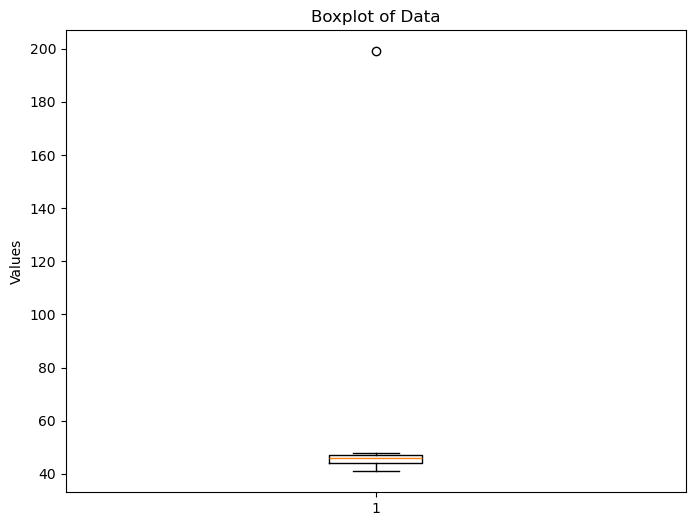

In [157]:
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.title("Boxplot of Data")
plt.ylabel("Values")
plt.show()

In [159]:
import numpy as np

p5 = np.percentile(data, 5)
p95 = np.percentile(data, 95)

In [161]:
p5

41.6

In [163]:
p95

153.69999999999987

In [165]:
filtered_data = [x for x in data if p5 <= x<= p95]

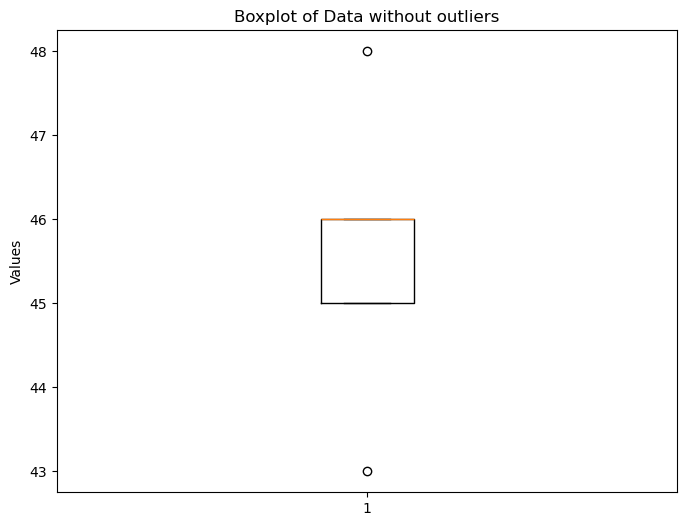

In [177]:
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data)
plt.title("Boxplot of Data without outliers")
plt.ylabel("Values")
# plt.ylim(30, 60)
plt.show()

In [229]:
# # compute mean and 95% confidence interval

# # avg = np.mean(data)
# # conf_int = stats.t.interval(0.95, len(data)-1, loc=avg, scale=stats.sme(data))

# # Compute mean
# avg = np.mean(data)

# # Compute 95% confidence interval
# conf_int = stats.t.interval(0.95, len(data)-1, loc=avg, scale=stats.sem(data))

In [242]:
import numpy as np
from scipy import stats

# Compute mean
avg = np.mean(data)

# Compute 95% confidence interval
conf_int = stats.t.interval(0.95, len(data)-1, loc=avg, scale=stats.sem(data))

print("Mean:", avg)
print("95% Confidence Interval:", conf_int)

Mean: 66.85714285714286
95% Confidence Interval: (12.926055881097327, 120.7882298331884)


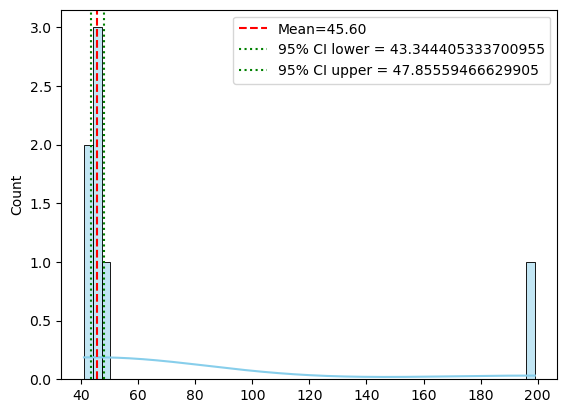

In [254]:
import seaborn as sns
sns.histplot(data, kde = True, color='skyblue')
plt.axvline(avg, color="red", linestyle = '--', label=f"Mean={avg:.2f}")
plt.axvline(conf_int[0], color="green", linestyle=":", label=f"95% CI lower = {conf_int[0]}")
plt.axvline(conf_int[1], color="green", linestyle=":", label=f"95% CI upper = {conf_int[1]}")
plt.legend()

In [248]:
import numpy as np
from scipy import stats

# Compute mean
avg = np.mean(filtered_data)

# Compute 95% confidence interval
conf_int = stats.t.interval(0.95, len(filtered_data)-1, loc=avg, scale=stats.sem(filtered_data))

print("Mean:", avg)
print("95% Confidence Interval:", conf_int)

Mean: 45.6
95% Confidence Interval: (43.344405333700955, 47.85559466629905)


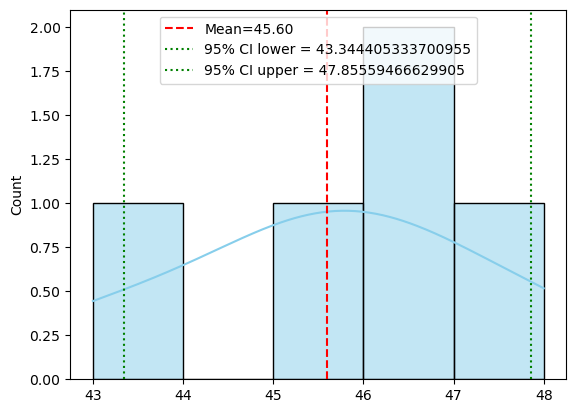

In [252]:
import seaborn as sns
sns.histplot(filtered_data, kde = True, color='skyblue')
plt.axvline(avg, color="red", linestyle = '--', label=f"Mean={avg:.2f}")
plt.axvline(conf_int[0], color="green", linestyle=":", label=f"95% CI lower = {conf_int[0]}")
plt.axvline(conf_int[1], color="green", linestyle=":", label=f"95% CI upper = {conf_int[1]}")
plt.legend()

In [258]:
# compare two groups of a t-test
group1 = np.random.normal(60, 8, 100)
group2 = np.random.normal(65, 8, 100)

{'whiskers': [<matplotlib.lines.Line2D at 0x1698e49b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1698e4da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168eef440>],
 'medians': [<matplotlib.lines.Line2D at 0x1698e52b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1698e54f0>],
 'means': []}

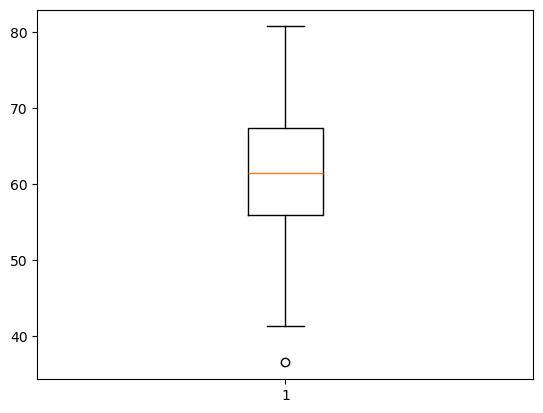

In [260]:
plt.boxplot(group1)

{'whiskers': [<matplotlib.lines.Line2D at 0x169941a30>,
 'caps': [<matplotlib.lines.Line2D at 0x169941fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x169941820>],
 'medians': [<matplotlib.lines.Line2D at 0x169942330>],
 'fliers': [<matplotlib.lines.Line2D at 0x169942570>],
 'means': []}

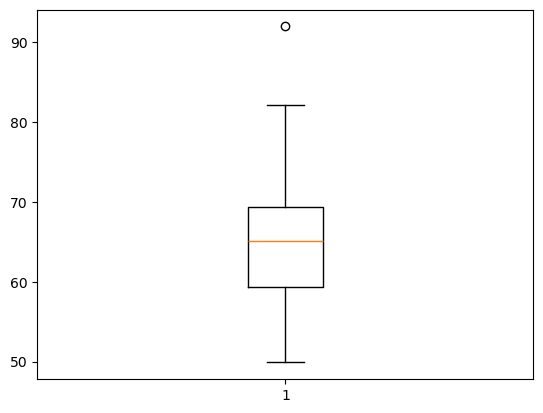

In [262]:
plt.boxplot(group2)

In [264]:
t_stat, p_val = stats.ttest_ind(group1, group2)

In [268]:
t_stat, p_val

(-3.3875429348940314, 0.000850699959327836)

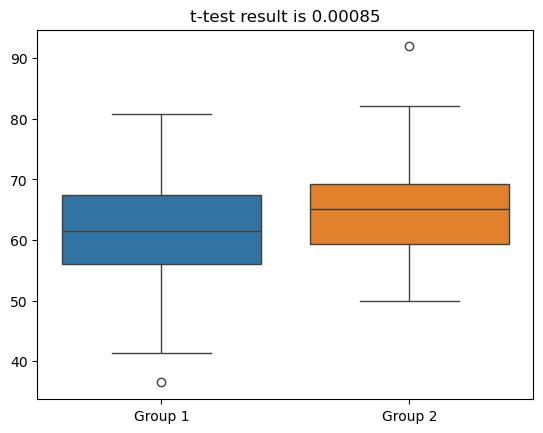

In [280]:
sns.boxplot(data = [group1, group2])
plt.xticks([0, 1], ["Group 1", "Group 2"])
plt.title(f"t-test result is {p_val:.5f}")
plt.show()

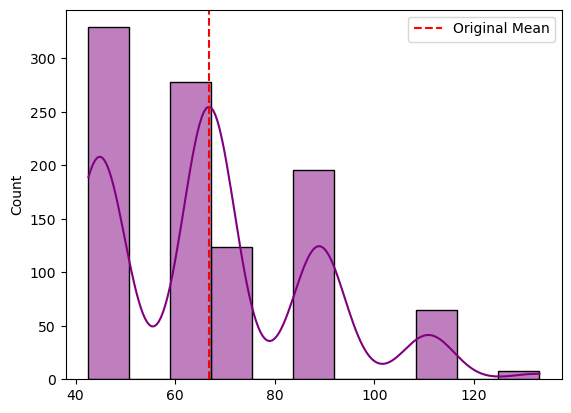

In [288]:
boot_means = []
for _ in range(1000):
    sample = np.random.choice(data, size = len(data), replace=True)
    boot_means.append(np.mean(sample))

sns.histplot(boot_means, kde = True, color = "Purple")
plt.axvline(np.mean(data), color="red", linestyle="--", label="Original Mean")
plt.legend()
plt.show()

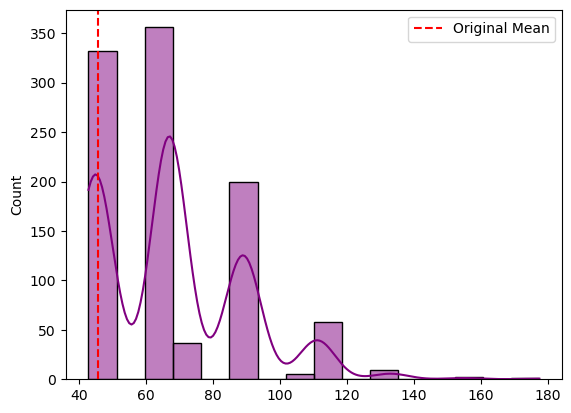

In [290]:
boot_means = []
for _ in range(1000):
    sample = np.random.choice(data, size = len(data), replace=True)
    boot_means.append(np.mean(sample))

sns.histplot(boot_means, kde = True, color = "Purple")
plt.axvline(np.mean(filtered_data), color="red", linestyle="--", label="Original Mean")
plt.legend()
plt.show()